In [4]:

import sys
sys.path.append("..")

from helpers.load_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [5]:
load_datafolder('raw')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 310: invalid start byte

In [5]:
calls['CallerTypeAffected3rdParty'].isna().value_counts()
calls['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult               192009
65+ Senior                 22575
Unknown                     9327
55-64 Adult                 8985
55-64 Older Adult           1762
13-18 Youth                  839
0-12 Child                    35
Prefer not to Disclose        16
Name: count, dtype: int64

In [7]:
reasons=dfs['reasons.csv']

In [4]:
merged_df=calls.merge(reasons,how='inner',left_on='callreportnum',right_on='callreportnum1')
merged_df.head()

NameError: name 'calls' is not defined

In [5]:
final=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data.csv')
final.head()

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/130791295.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  final=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data.csv')


,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,CallerDemographicsAgeGroup,CallerDemographicsCallerType,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Abuse,Domestic Violence
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
2,54694245.0,2018-07-16,1899-12-31 16:39:00,2018-07-16,1899-12-31 17:07:00,28,unknown,Assessment and Referral,Text Message,Unknown,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,BC Hydro CCF,NaN
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,19-54 Adult,Service Provider,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,NaN


In [6]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(final)

                                               n_miss  ratio
CallerDemographicsInterpretationOtherlanguage  314671  99.94
CallerDemographicsInterpretationLanguage       312349  99.20
CallerTypeAffected3rdParty                     286627  91.03
ReasonDetail                                    73979  23.50
CityName                                          560   0.18
PublicityOtherPublicity                           239   0.08
CallerDemographicsGender                           18   0.01
CallerDemographicsCallerType                        3   0.00
CallerDemographicsAgeGroup                          1   0.00


['CityName',
 'CallerDemographicsGender',
 'CallerDemographicsAgeGroup',
 'CallerDemographicsCallerType',
 'CallerTypeAffected3rdParty',
 'CallerDemographicsInterpretationLanguage',
 'CallerDemographicsInterpretationOtherlanguage',
 'PublicityOtherPublicity',
 'ReasonDetail']

In [7]:
calls[['DateStart','TimeStart','DateEnd','TimeEnd']]

NameError: name 'calls' is not defined

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureW

<Axes: xlabel='DateEnd', ylabel='CallLength'>

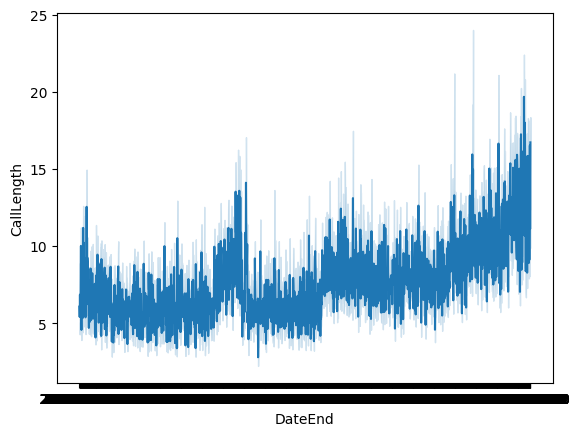

In [8]:
final[['DateEnd','CallLength']]
sns.lineplot(data=final,x='DateEnd',y='CallLength')

In [9]:
final.columns

Index(['callreportnum', 'DateStart', 'TimeStart', 'DateEnd', 'TimeEnd',
       'CallLength', 'CityName', 'CallType', 'ContactMethod',
       'CallerDemographicsGender', 'CallerDemographicsAgeGroup',
       'CallerDemographicsCallerType', 'CallerTypeAffected3rdParty',
       'CallerDemographicsInterpretationLanguage',
       'CallerDemographicsInterpretationOtherlanguage',
       'PublicityOtherPublicity', 'Mainreason', 'ReasonDetail'],
      dtype='object')

In [10]:
final.head()

,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,CallerDemographicsAgeGroup,CallerDemographicsCallerType,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Abuse,Domestic Violence
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
2,54694245.0,2018-07-16,1899-12-31 16:39:00,2018-07-16,1899-12-31 17:07:00,28,unknown,Assessment and Referral,Text Message,Unknown,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,BC Hydro CCF,NaN
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,19-54 Adult,Service Provider,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,NaN


/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CallType', ylabel='count'>

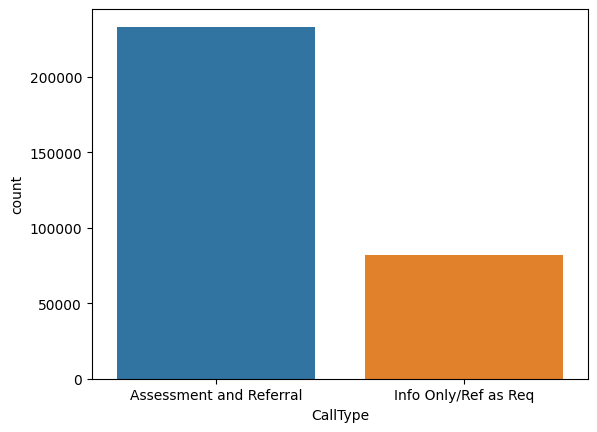

In [11]:
sns.countplot(data=final,x='CallType')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CallerDemographicsAgeGroup', ylabel='count'>

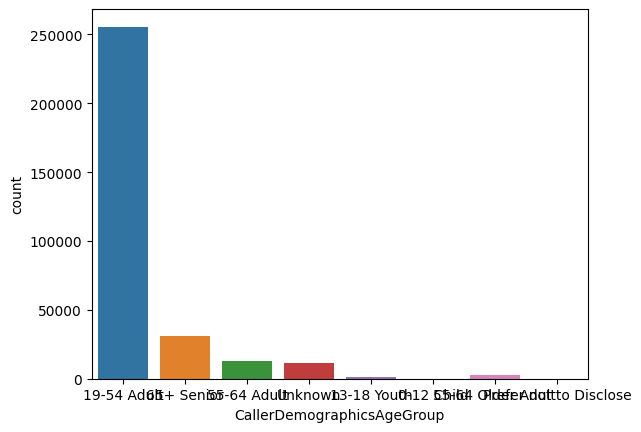

In [12]:
sns.countplot(data=final,x='CallerDemographicsAgeGroup')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


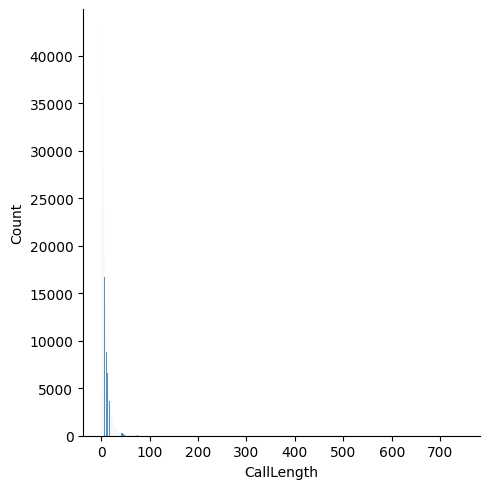

In [13]:
sns.displot(data=final,x='CallLength')

In [14]:
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('2 Spirited','2 Spirit')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Trans Female','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Trans Male','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Transgender','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Prefer not to Disclose','Unknown')

In [15]:
final['CallerDemographicsGender'].value_counts()

CallerDemographicsGender
Female          188273
Male            115742
Unknown          10172
Trans              540
Non-binary          69
2 Spirit            25
Gender Fluid        15
Name: count, dtype: int64

In [16]:
mod_df=final[(final['CallerDemographicsGender'] == 'Female') | (final['CallerDemographicsGender'] == 'Male')] 

In [17]:
final['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult               255598
65+ Senior                 31280
55-64 Adult                12663
Unknown                    11211
55-64 Older Adult           2903
13-18 Youth                 1143
0-12 Child                    34
Prefer not to Disclose        21
Name: count, dtype: int64

In [18]:
mod_df=final[(final['CallerDemographicsAgeGroup']=='65+ Senior')|(final['CallerDemographicsAgeGroup']=='19-54 Adult') | (final['CallerDemographicsAgeGroup']=='55-64 Adult')
            | (final['CallerDemographicsAgeGroup']=='13-18 Youth') ]
mod_df['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult    255598
65+ Senior      31280
55-64 Adult     12663
13-18 Youth      1143
Name: count, dtype: int64

In [19]:
mod_df['DateStart']=pd.to_datetime(mod_df['DateStart'])
mod_df['Year']=mod_df['DateStart'].dt.year

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/2854001211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['DateStart']=pd.to_datetime(mod_df['DateStart'])
/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/2854001211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['Year']=mod_df['DateStart'].dt.year


/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

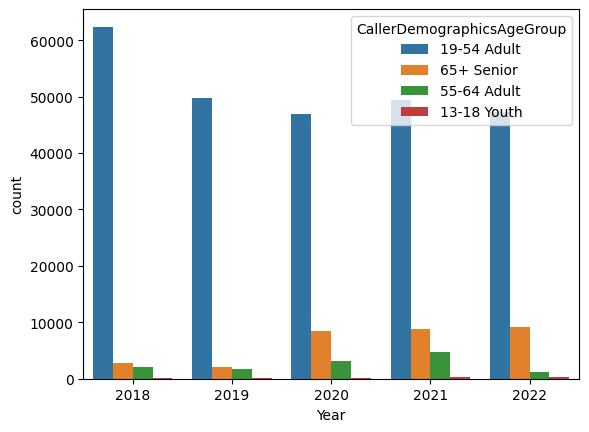

In [20]:
sns.countplot(data=mod_df,x='Year',hue='CallerDemographicsAgeGroup')

In [21]:
mod_df['PublicityOtherPublicity'].value_counts()
mod_df=mod_df[mod_df['PublicityOtherPublicity'] != 'Not Obtained']

In [50]:
mod_df=mod_df[['CallType','Year','CityName','ContactMethod','CallerDemographicsAgeGroup','CallLength','CallerDemographicsGender']]
mod_df=mod_df.dropna()
mod_df.head()

,CallType,Year,CityName,ContactMethod,CallerDemographicsAgeGroup,CallLength,CallerDemographicsGender
5,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Male
6,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,1,Male
7,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Female
8,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Female
10,Assessment and Referral,2018,Surrey,Telephone,19-54 Adult,8,Female


In [51]:
mod_df=mod_df[(mod_df['CityName'] == 'Vancouver') | (mod_df['CityName'] == 'Surrey') | (mod_df['CityName'] == 'Burnaby')] 

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

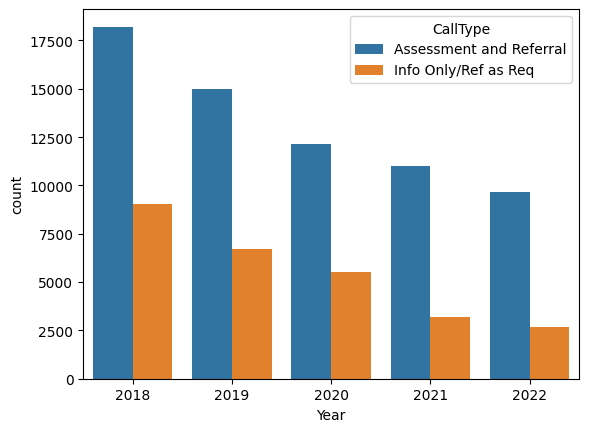

In [61]:
sns.countplot(data=mod_df,x='Year',hue='CallType')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

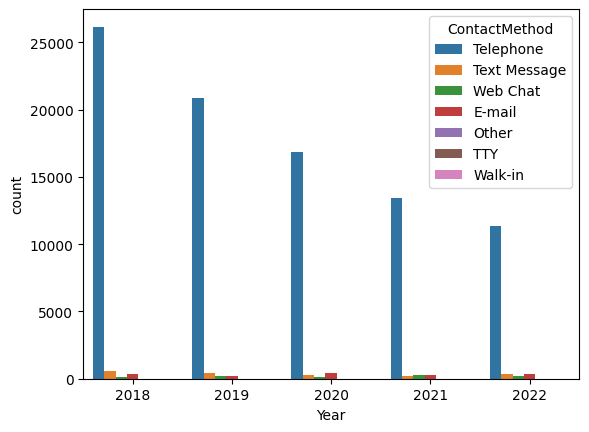

In [62]:
sns.countplot(data=mod_df,x='Year',hue='ContactMethod')

In [53]:
#gender,year,age group,city,call type, contact method
features=['CallType','CityName','Year','ContactMethod','CallerDemographicsAgeGroup','CallerDemographicsGender']
Y=mod_df['CallLength']
X=mod_df[features]

In [54]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', preprocessing.OneHotEncoder(), features)
    ],
    remainder='passthrough'  # Keep numeric features that are not transformed
)

In [55]:
lr_clf = make_pipeline(
    encoder,
    StandardScaler(with_mean=False),
    LinearRegression()
)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,random_state=0)

In [64]:
mod=lr_clf.fit(X_train,y_train)

In [65]:
mod.score(X_test,y_test)

0.0844009680958906

In [66]:
preds=mod.predict(X_test)
preds

array([8.07135795, 5.46026772, 5.22014348, ..., 9.47805726, 5.46026772,
       6.65189861])

In [67]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 7.3969964199664355
